<a href="https://colab.research.google.com/github/ashok2216-A/Data_Analytics/blob/main/heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Failure Prediction**👨‍⚕️💔

**Heart failure (HF), also known as congestive heart failure (CHF) and (congestive) cardiac failure (CCF), is a set of manifestations caused by the failure of the heart's function as a pump supporting the blood flow through the body; its signs and symptoms result from a structural and/or functional abnormality of the heart, that disrupts its filling with blood or its ejecting of it during each heart beat.Signs and symptoms of heart failure commonly include shortness of breath, excessive tiredness, and leg swelling.The shortness of breath is usually worse with exercise or while lying down, and may wake the person at night. A limited ability to exercise is also a common feature.Chest pain, including angina, does not typically occur due to heart failure.**

**How common is condition?
Common (More than 10 lakh cases per year in India)
Is condition treatable?
Treatments can help manage condition, no known cure
Does diagnosis require lab test or imaging?
Often requires lab test or imaging
Condition Highlight
Common for ages 60 and older
Condition Highlight
More common in females
Condition Highlight
Family history may increase likelihood
Condition Highlight
Urgent medical attention recommended in severe cases**

# **Description**

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

# **Import Modules**

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
plt.rc('seaborn-darkgrid')
plt.style.use('dark_background')
plt.rc('figure', figsize=(38,8))
plt.rc('font', size=12)
plt.rc('lines', markersize=8)
import warnings
warnings.filterwarnings('ignore')
import pickle
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# **Read DataFrame**

In [ ]:
h_df = pd.read_csv("../input/heart-failure-prediction/heart.csv")
h_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**DataFrame Shape**

In [ ]:
h_df.shape

(918, 12)

# **Find Missing Values**

In [ ]:
print(h_df.isna().sum())
print(h_df.isnull().sum())
print('Duplicated \t',h_df.duplicated().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Duplicated 	 0


**Data Info**

In [ ]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**Describe DataFrame**

In [ ]:
h_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Data Columns**

In [ ]:
h_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

**Mean of Sex**

In [ ]:
h_df.groupby(by=h_df['Sex']).mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Sex,,,,,,,
F,52.492228,132.212435,241.196891,0.134715,146.139896,0.668912,0.259067
M,53.782069,132.445517,187.513103,0.259310,134.325517,0.945517,0.631724


**Median of Sex**

In [ ]:
h_df.groupby(by=h_df['Sex']).median()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Sex,,,,,,,
F,53.0,130.0,243.0,0.0,150.0,0.0,0.0
M,55.0,130.0,219.0,0.0,134.0,0.8,1.0


**Sum of Sex**

In [ ]:
h_df.groupby(by=h_df['Sex']).sum()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Sex,,,,,,,
F,10131,25517,46551,26,28205,129.1,50
M,38992,96023,135947,188,97386,685.5,458


**Standard Deviation of Sex**

In [ ]:
h_df.groupby(by=h_df['Sex']).std()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Sex,,,,,,,
F,9.517593,19.392638,85.195441,0.342307,22.154902,0.956865,0.439262
M,9.397864,18.286739,112.351444,0.438559,25.719191,1.087154,0.482670


In [ ]:
#'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 
#'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 
#'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 
#'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 
#'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 
#'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 
#'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magm...'

# **Data Visualization**

# **Find Outliers**

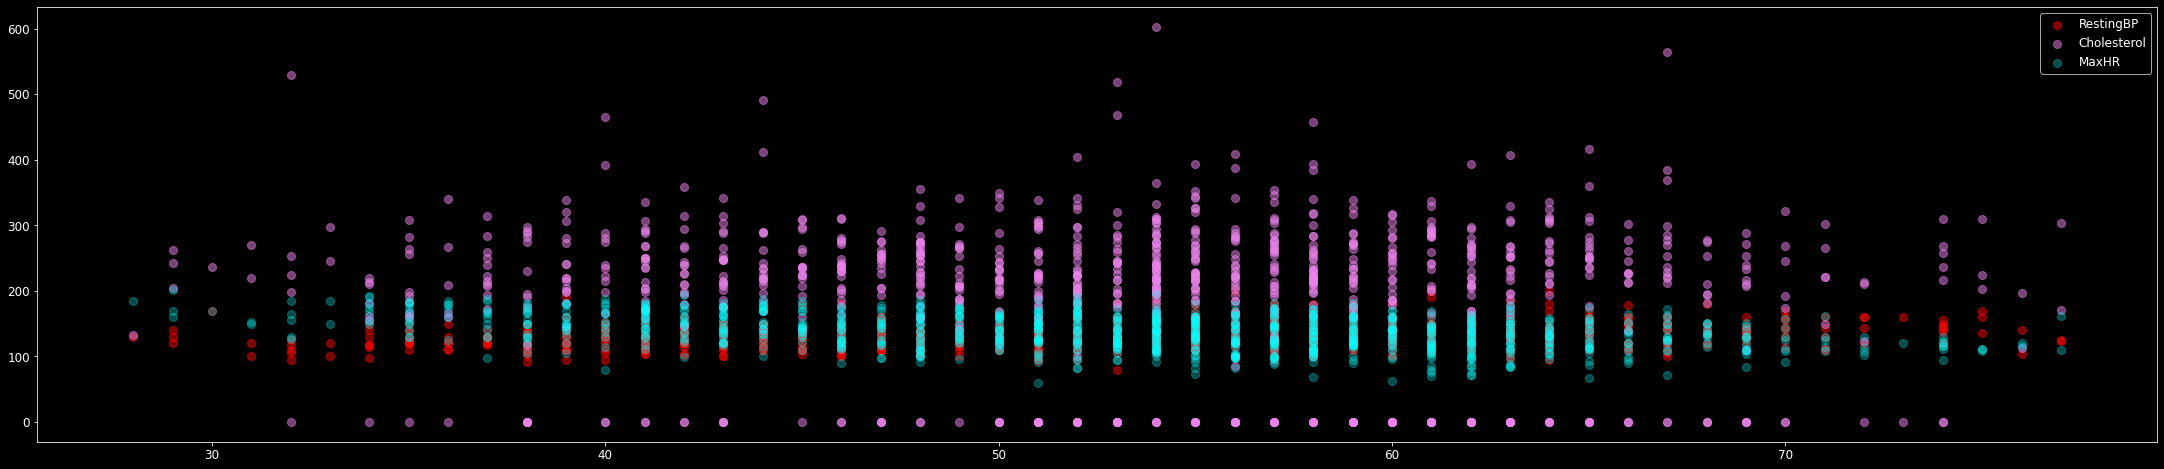

In [ ]:
plt.scatter(h_df['Age'], h_df['RestingBP'],alpha=0.5,color='red')
plt.scatter(h_df['Age'], h_df['Cholesterol'],alpha=0.5,color='violet')
plt.scatter(h_df['Age'], h_df['MaxHR'],alpha=0.3,color='aqua')
plt.legend(['RestingBP','Cholesterol','MaxHR'])

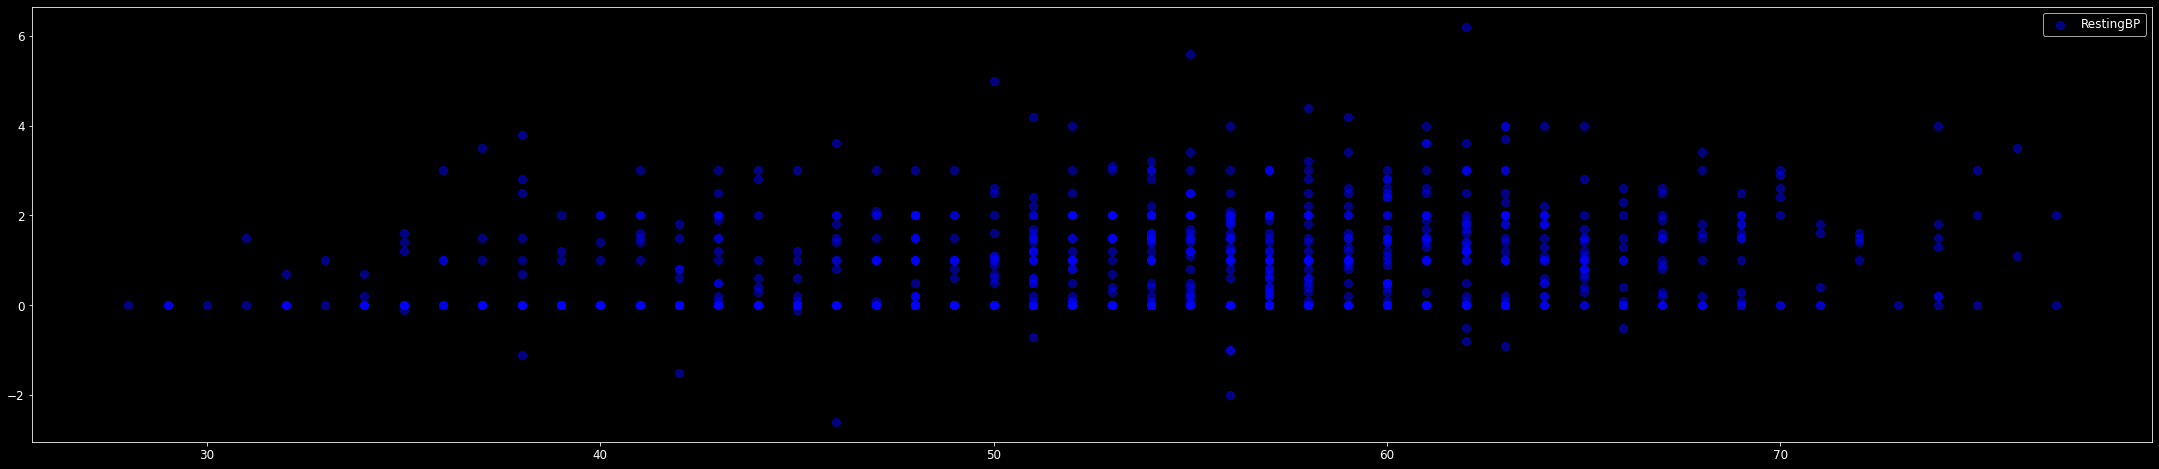

In [ ]:
plt.scatter(h_df['Age'], h_df['Oldpeak'],alpha=0.5,color='blue')
plt.legend(['RestingBP'])

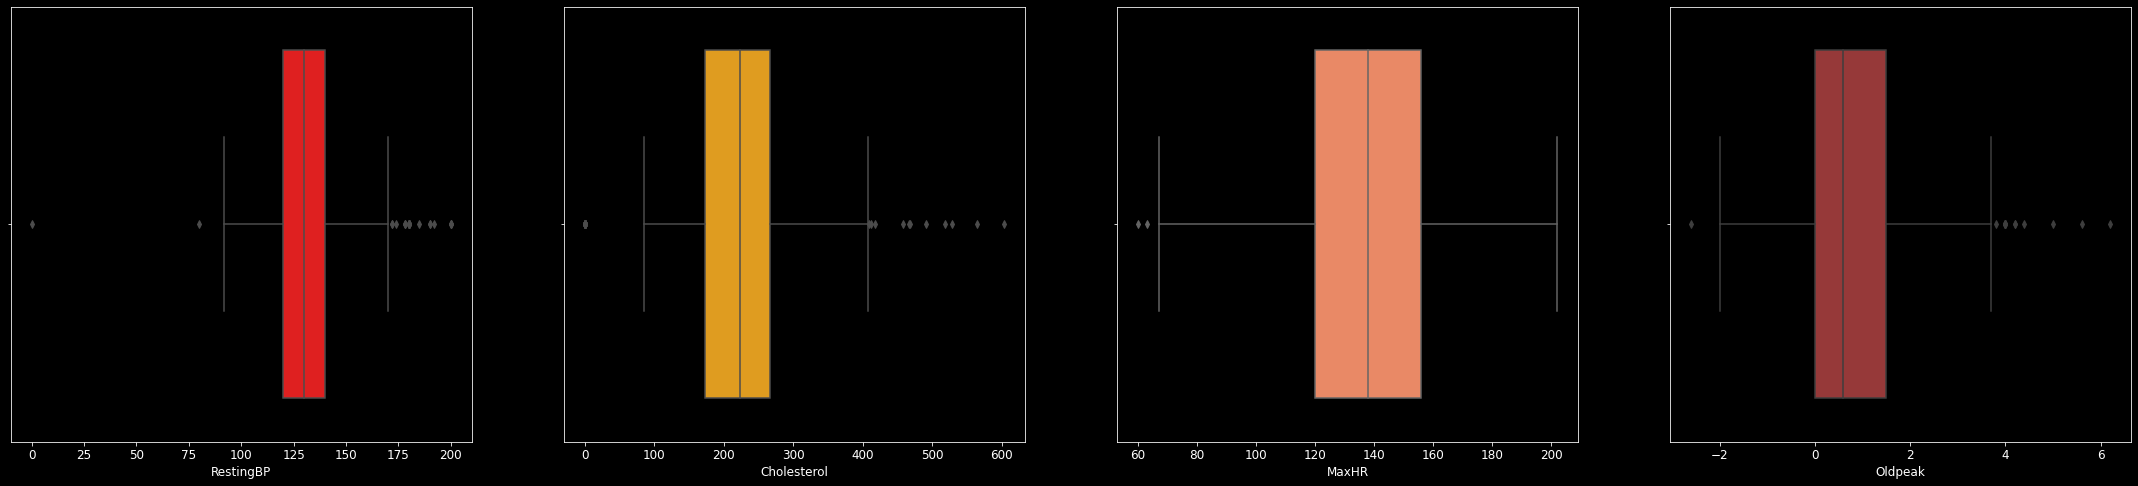

In [ ]:
plt.rc('figure', figsize=(38,8))
plt.subplot(1,4,1)
sns.boxplot(h_df['RestingBP'],color='red')
plt.subplot(1,4,2)
sns.boxplot(h_df['Cholesterol'],color='orange')
plt.subplot(1,4,3)
sns.boxplot(h_df['MaxHR'],color='coral')
plt.subplot(1,4,4)
sns.boxplot(h_df['Oldpeak'],color='brown')
plt.show()

# **Count Outliers**

In [ ]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 - q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
int_col = h_df.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis=1)
num = int_col.columns
for i in num:
    count_outliers(h_df,i)


No outliers in Age
There are outliers in RestingBP
Count of outliers are: 28
There are outliers in Cholesterol
Count of outliers are: 183
There are outliers in FastingBS
Count of outliers are: 214
There are outliers in MaxHR
Count of outliers are: 2
There are outliers in Oldpeak
Count of outliers are: 16
No outliers in HeartDisease


# **Remove Outliers**

In [ ]:
def remove_outliers(data):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    #data = data.select_dtypes(include=numerics)

    
    Q1 = data.quantile(0.30)
    Q3 = data.quantile(0.70)
    IQR = Q3 - Q1

    data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))]

    return data

In [ ]:
h_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
h_df.shape

(918, 12)

In [ ]:
h_df['RestingBP'] = remove_outliers(h_df['RestingBP'])
h_df['Cholesterol'] = remove_outliers(h_df['Cholesterol'])
h_df['MaxHR'] = remove_outliers(h_df['MaxHR'])
h_df['Oldpeak'] = remove_outliers(h_df['Oldpeak'])

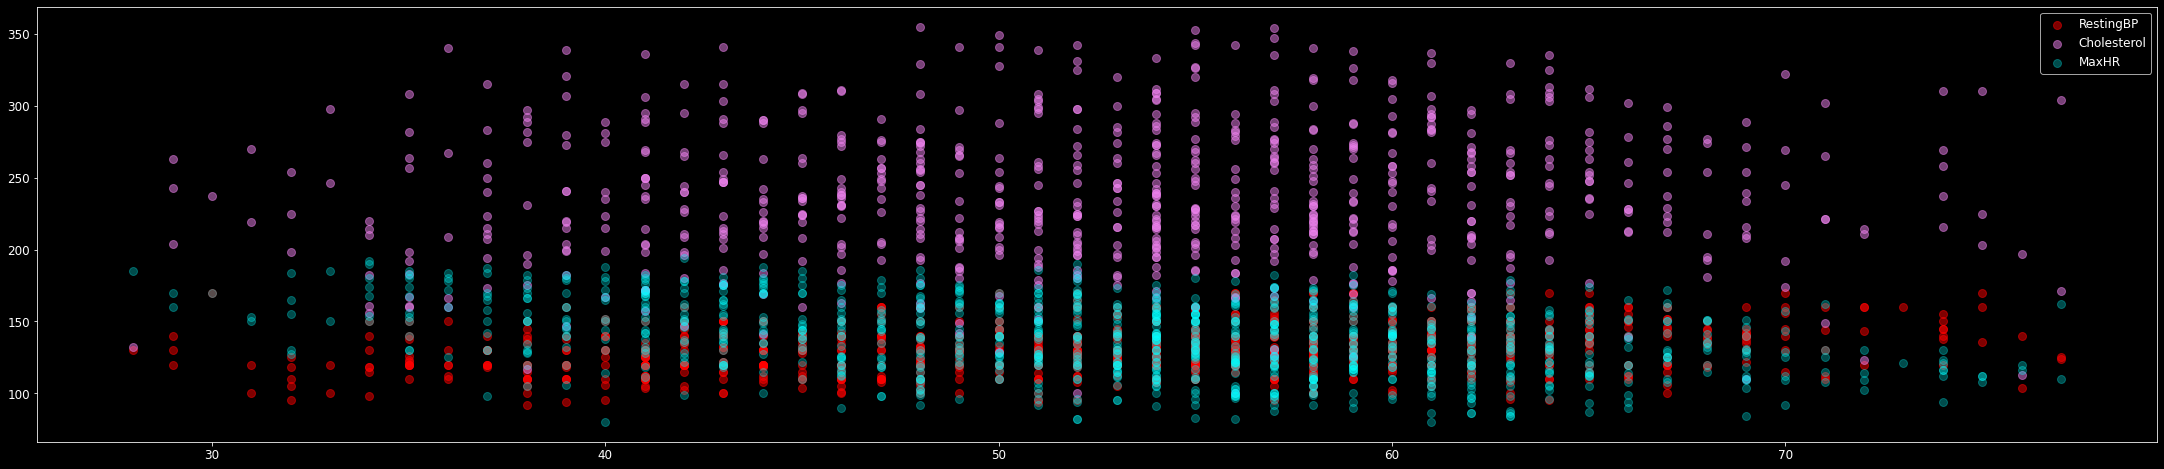

In [ ]:
plt.scatter(h_df['Age'], h_df['RestingBP'],alpha=0.5,color='red')
plt.scatter(h_df['Age'], h_df['Cholesterol'],alpha=0.5,color='violet')
plt.scatter(h_df['Age'], h_df['MaxHR'],alpha=0.3,color='aqua')
#plt.scatter(h_df['Age'], h_df['Oldpeak'],alpha=0.5,color='blue')
plt.legend(['RestingBP','Cholesterol','MaxHR'])

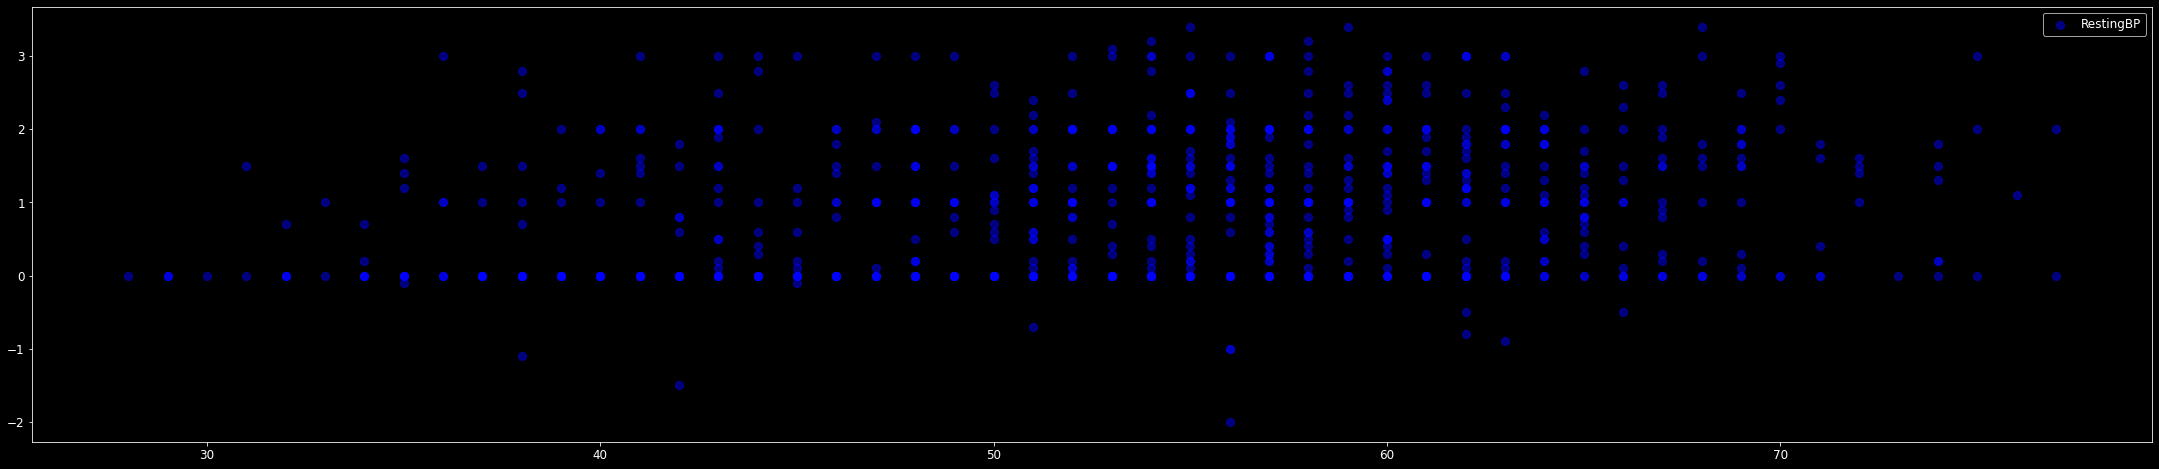

In [ ]:
plt.scatter(h_df['Age'], h_df['Oldpeak'],alpha=0.5,color='blue')
plt.legend(['RestingBP'])

# **Outliers are Removed. Good Data!**

**Except FastingBS because it have Binary values**

In [ ]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 - q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
int_col = h_df.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis=1)
num = int_col.columns
for i in num:
    count_outliers(h_df,i)


No outliers in Age
There are outliers in RestingBP
Count of outliers are: 0
There are outliers in Cholesterol
Count of outliers are: 2
There are outliers in FastingBS
Count of outliers are: 214
No outliers in MaxHR
No outliers in Oldpeak
No outliers in HeartDisease


**Verify DataFrame**

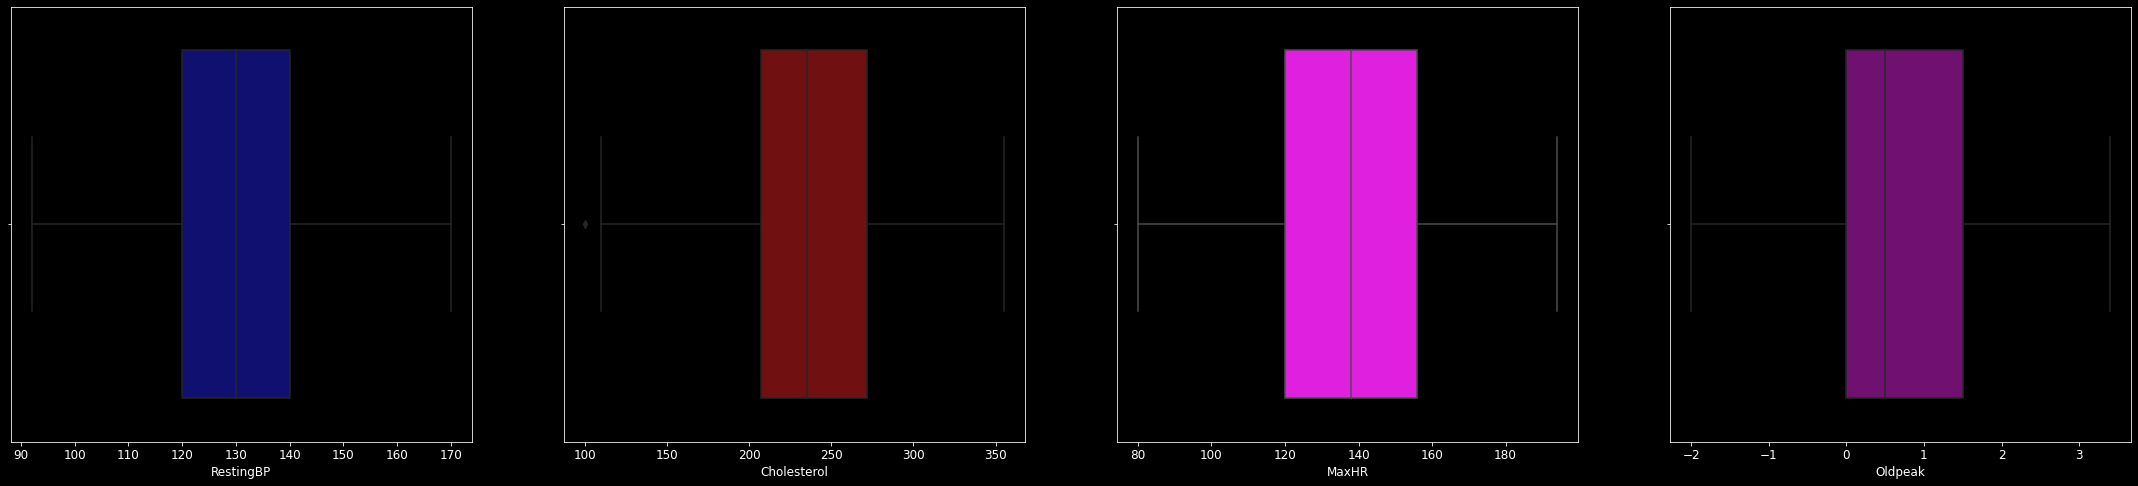

In [ ]:
plt.rc('figure', figsize=(38,8))
plt.subplot(1,4,1)
sns.boxplot(h_df['RestingBP'],color='navy')
plt.subplot(1,4,2)
sns.boxplot(h_df['Cholesterol'],color='maroon')
plt.subplot(1,4,3)
sns.boxplot(h_df['MaxHR'],color='magenta')
plt.subplot(1,4,4)
sns.boxplot(h_df['Oldpeak'],color='purple')
plt.show()

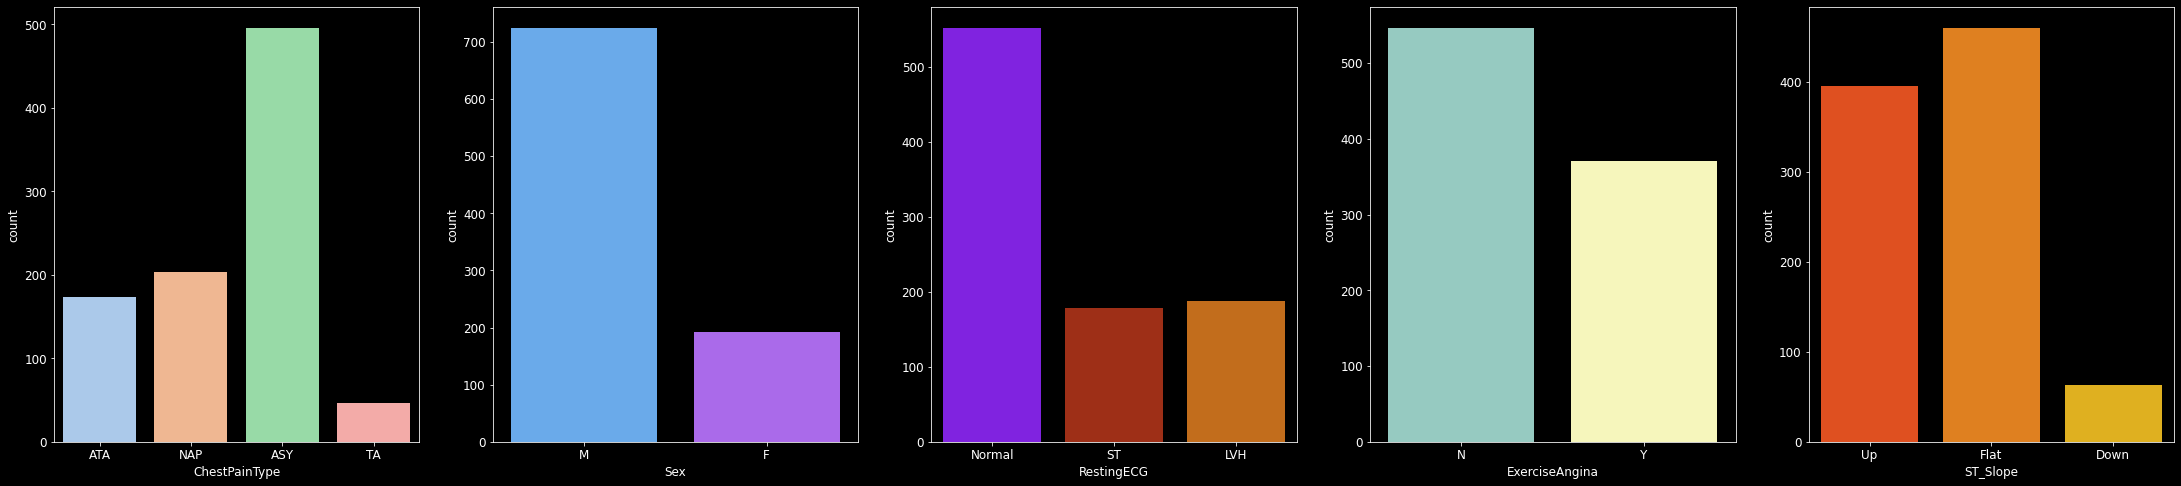

In [ ]:
plt.subplot(1,5,1)
sns.countplot(h_df['ChestPainType'],palette='pastel')
plt.subplot(1,5,2)
sns.countplot(h_df['Sex'],palette='cool')
plt.subplot(1,5,3)
sns.countplot(h_df['RestingECG'],palette='gnuplot')
plt.subplot(1,5,4)
sns.countplot(h_df['ExerciseAngina'],palette='Set3')
plt.subplot(1,5,5)
sns.countplot(h_df['ST_Slope'],palette='autumn')
plt.show()

**Sum of Comparison with each columns**

In [ ]:
h_df.groupby(by=['HeartDisease','Sex']).sum()

Age  RestingBP  Cholesterol  FastingBS    MaxHR  Oldpeak
HeartDisease Sex                                                            
0            F     7322    17877.0      32787.0         10  21314.0     62.3
             M    13404    33797.0      55673.0         34  39157.0     97.3
1            F     2809     5988.0       9566.0         16   6891.0     49.0
             M    25588    59029.0      74059.0        154  57060.0    518.1

In [ ]:
h_df.groupby(by=['ChestPainType','Sex']).sum()

Age  RestingBP  Cholesterol  FastingBS    MaxHR  Oldpeak  \
ChestPainType Sex                                                               
ASY           F     3798     8245.0      14862.0         14   9739.0     63.0   
              M    23462    55000.0      70415.0        127  53356.0    444.4   
ATA           F     2975     7359.0      13706.0          5   9142.0     18.9   
              M     5544    14317.0      25356.0         14  16447.0     34.3   
NAP           F     2816     6851.0      11676.0          5   7872.0     22.1   
              M     8006    18822.0      26545.0         36  21063.0    104.3   
TA            F      542     1410.0       2109.0          2   1452.0      7.3   
              M     1980     4687.0       7416.0         11   5351.0     32.4   

                   HeartDisease  
ChestPainType Sex                
ASY           F              39  
              M             353  
ATA           F               4  
              M              20  
NAP           F               6  
              M              66  
TA            F               1  
              M              19

In [ ]:
h_df.groupby(by=['RestingECG','Sex']).sum()

Age  RestingBP  Cholesterol  FastingBS    MaxHR  Oldpeak  \
RestingECG Sex                                                               
LVH        F     2641     6132.0      10382.0          9   7040.0     31.4   
           M     7928    18005.0      30834.0         33  19469.0    136.6   
Normal     F     6087    14440.0      25451.0         13  17146.0     66.4   
           M    22474    55220.0      76450.0         98  58088.0    335.2   
ST         F     1403     3293.0       6520.0          4   4019.0     13.5   
           M     8590    19601.0      22448.0         57  18660.0    143.6   

                HeartDisease  
RestingECG Sex                
LVH        F              14  
           M              92  
Normal     F              29  
           M             256  
ST         F               7  
           M             110

In [ ]:
h_df.groupby(by=['FastingBS','Sex']).sum()

Age  RestingBP  Cholesterol    MaxHR  Oldpeak  HeartDisease
FastingBS Sex                                                               
0         F     8659    20721.0      37458.0  24631.0     91.2            34
          M    28288    68791.0     105871.0  72245.0    432.9           304
1         F     1472     3144.0       4895.0   3574.0     20.1            16
          M    10704    24035.0      23861.0  23972.0    182.5           154

**Pairplot**

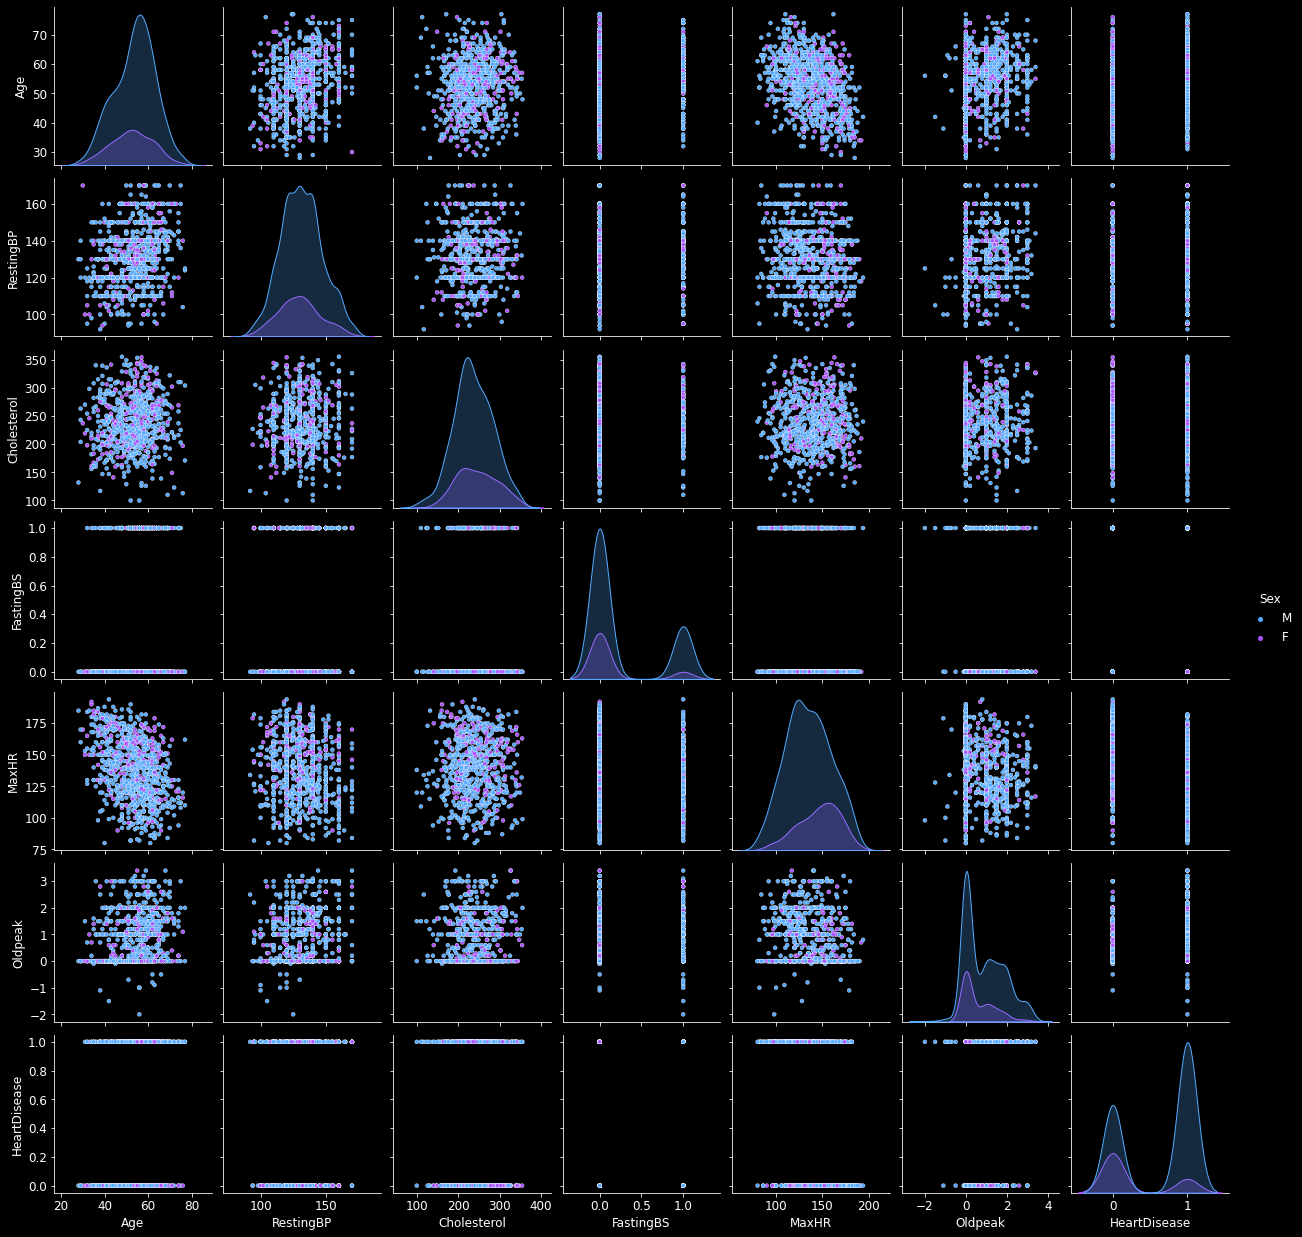

In [ ]:
plt.rc('lines', markersize=4)
sns.pairplot(h_df,hue='Sex',palette='cool')

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

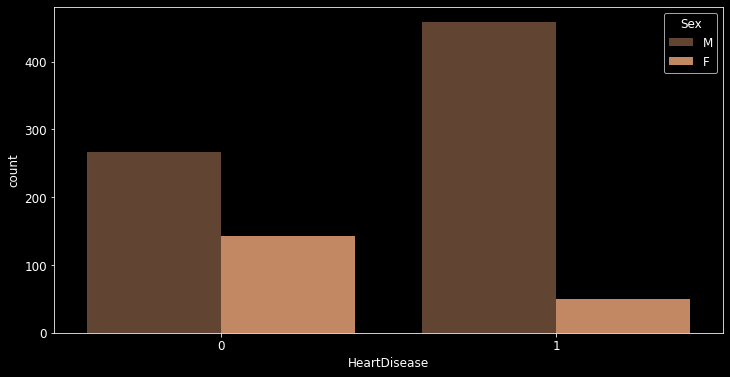

In [ ]:
plt.rc('figure', figsize=(12,6))
sns.countplot(h_df['HeartDisease'],hue=h_df['Sex'],palette='copper')

<AxesSubplot:>

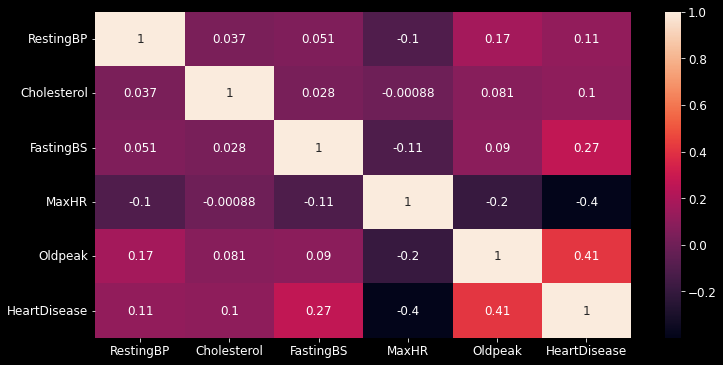

In [ ]:
htmap  = h_df.drop(columns=['ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope','Sex'], axis=1).set_index('Age')
sns.heatmap(htmap.corr(),annot=True)

# **One HotEncoding**

In [ ]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    h_df[c1]= label_encoder.fit_transform(h_df[c1])
    h_df[c1].unique()

In [ ]:
LABEL_ENCODING("Sex")
LABEL_ENCODING("ChestPainType")
LABEL_ENCODING("RestingECG")
LABEL_ENCODING("ExerciseAngina")
LABEL_ENCODING("ST_Slope")
h_df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.0,289.0,0,1,172.0,0,0.0,2,0
1,49,0,2,160.0,180.0,0,1,156.0,0,1.0,1,1
2,37,1,1,130.0,283.0,0,2,98.0,0,0.0,2,0
3,48,0,0,138.0,214.0,0,1,108.0,1,1.5,1,1
4,54,1,2,150.0,195.0,0,1,122.0,0,0.0,2,0


# **Clean the DataFrame**

In [ ]:
print(h_df.isna().sum())

Age                 0
Sex                 0
ChestPainType       0
RestingBP          28
Cholesterol       197
FastingBS           0
RestingECG          0
MaxHR              13
ExerciseAngina      0
Oldpeak            23
ST_Slope            0
HeartDisease        0
dtype: int64


**Drop the Null Values**

In [ ]:
h_df = h_df.dropna(axis=0)
print(h_df.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
x = h_df.iloc[:,:11]
y = h_df.iloc[:,11:12]

# **Split the DataFrame into Train and Test Data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40, shuffle=True)

In [ ]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (511, 11)
y_train: (511, 1)
x_test: (171, 11)
y_test: (171, 1)


In [ ]:
!pip install scikit-learn  -U

     |████████████████████████████████| 23.2 MB 444 kB/s            
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.5.0 which is incompatible.
hypertools 0.7.0 requires scikit-learn!=0.22,<0.24,>=0.19.1, but you have scikit-learn 1.0.1 which is incompatible.


# **Train in Logistic Regression**

In [ ]:
log_reg = LogisticRegression(solver='liblinear')
logreg = log_reg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0])

# **Compare with Actual Data**

Text(0.5, 0, 'Heart Disease')

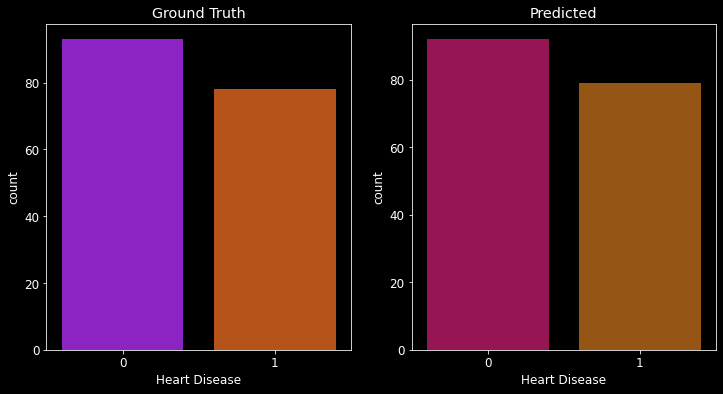

In [ ]:
y_test = np.array(y_test)
y_test=y_test.reshape(171,)
plt.rc('figure', figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(y_test,palette='gnuplot')
plt.title('Ground Truth')
plt.xlabel('Heart Disease')
plt.subplot(1,2,2)
sns.countplot(logreg_pred, palette='brg')
plt.title('Predicted')
plt.xlabel('Heart Disease')

Text(0.5, 0, 'Heart Disease')

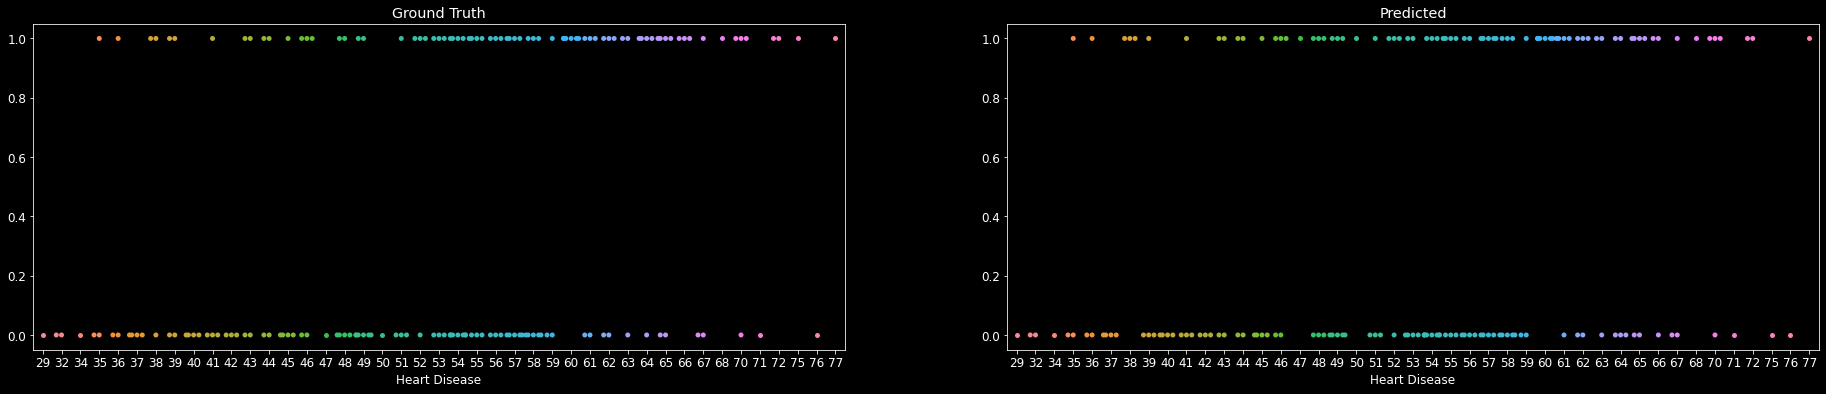

In [ ]:
plt.rc('figure', figsize=(32,6))
plt.subplot(1,2,1)
sns.swarmplot(x_test['Age'],logreg_pred)
plt.title('Ground Truth')
plt.xlabel('Heart Disease')
plt.subplot(1,2,2)
sns.swarmplot(x_test['Age'],y_test)
plt.title('Predicted')
plt.xlabel('Heart Disease')

# **Accuracy Metrics**

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, logreg_pred))

Accuracy: 0.8654970760233918


# **Confusion Matrix**

[[81 12]
 [11 67]]


<AxesSubplot:>

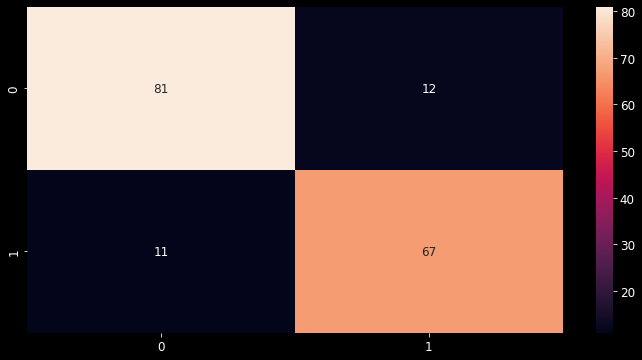

In [ ]:
plt.rc('figure', figsize=(12,6))
print(confusion_matrix(y_test,logreg_pred))
sns.heatmap(confusion_matrix(y_test,logreg_pred),annot=True)

In [ ]:
print(classification_report(y_test,logreg_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88        93
           1       0.85      0.86      0.85        78

    accuracy                           0.87       171
   macro avg       0.86      0.86      0.86       171
weighted avg       0.87      0.87      0.87       171



# **Save Model for Deployment**

In [ ]:
pickle.dump(log_reg, open('model.pkl', 'wb'))

<div style="width:100%;text-align: center;"> <img align=middle src="https://media.giphy.com/media/21HtXqCprrU7Xsr0qo/giphy.gif" alt="Heat beating" style="height:400px;margin-top:3rem;"> </div>